In [60]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d mayankpatel14/second-hand-used-cars-data-set-linear-regression

Saving kaggle.json to kaggle.json
second-hand-used-cars-data-set-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [61]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv('/content/second-hand-used-cars-data-set-linear-regression.zip')

In [62]:
df.head(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
5,6,650007,844846,6,148846,2,9,13,138,61,109,177933.5
6,7,633344,756063,5,78025,1,9,15,171,94,132,410877.0
7,8,662990,891569,6,76546,1,2,12,146,109,96,467471.5
8,9,543184,841354,7,57662,4,7,14,151,50,132,462397.5
9,10,573043,879481,2,132347,2,3,12,200,115,82,197266.0


In [63]:
df.shape

(1000, 12)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


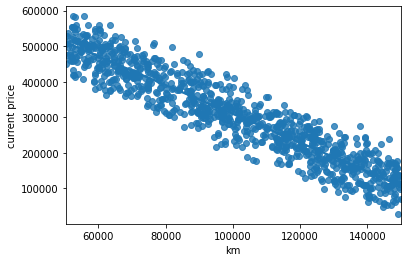

In [65]:
ax=sns.regplot(x='km',y='current price',data=df)

In [99]:
x=df[['on road old','on road now','years','km','rating','condition','economy','top speed','hp','torque']]
y=df['current price']

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [101]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
model=keras.Sequential([keras.layers.Dense(10,activation=tf.nn.relu,input_shape=[10,]),
                        keras.layers.Dense(1)])

In [102]:
model.compile(optimizer=Adam(0.01),loss='mean_squared_error')
history=model.fit(x_train,y_train,validation_split=0.25,epochs=30)

Epoch 1/30
19/19 [==============================] - 0s 6ms/step - loss: 16133257216.0000 - val_loss: 14673924096.0000
Epoch 2/30
19/19 [==============================] - 0s 4ms/step - loss: 14487826432.0000 - val_loss: 13317008384.0000
Epoch 3/30
19/19 [==============================] - 0s 4ms/step - loss: 12500268032.0000 - val_loss: 11659260928.0000
Epoch 4/30
19/19 [==============================] - 0s 4ms/step - loss: 10822022144.0000 - val_loss: 9447160832.0000
Epoch 5/30
19/19 [==============================] - 0s 4ms/step - loss: 8794080256.0000 - val_loss: 7387969536.0000
Epoch 6/30
19/19 [==============================] - 0s 4ms/step - loss: 6515125248.0000 - val_loss: 5235883520.0000
Epoch 7/30
19/19 [==============================] - 0s 4ms/step - loss: 4284455680.0000 - val_loss: 3085443840.0000
Epoch 8/30
19/19 [==============================] - 0s 4ms/step - loss: 2408652544.0000 - val_loss: 1511312640.0000
Epoch 9/30
19/19 [==============================] - 0s 4ms/step -

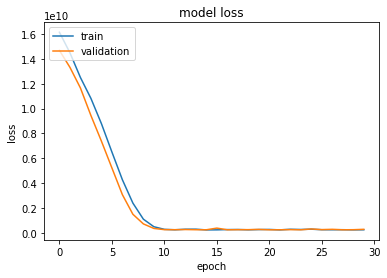

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [104]:
print(model.predict([[691388,811335,6,61559,3,9,12,160,53,105]]))

[[522193.4]]


In [105]:
print('Coefficients: \n', model.get_weights())

Coefficients: 
 [array([[-2.23845720e-01,  4.06026244e-02,  4.18760926e-01,
         1.91559687e-01,  2.82913536e-01,  1.76004171e-01,
         3.71450841e-01,  1.40916705e-01,  1.17099643e-01,
         1.08369112e-01],
       [-3.80452871e-01,  2.78880745e-01, -1.27238765e-01,
         2.28148717e-02,  1.95218801e-01, -3.53115618e-01,
        -4.76114810e-01, -4.01088536e-01, -8.84212852e-02,
        -1.05534464e-01],
       [-4.07933503e-01, -2.35654265e-01, -4.46988642e-01,
         1.23138897e-01, -9.94034290e-01, -5.24752676e-01,
         4.39086378e-01, -4.04796541e-01,  1.77487910e-01,
         2.55901635e-01],
       [ 2.20895350e-01, -1.49255574e+00, -9.62740362e-01,
        -6.07118249e-01, -1.66017783e+00,  3.87963474e-01,
         1.19292200e-01, -3.46028805e-03, -3.38375568e-01,
        -1.79416537e-01],
       [ 8.11183453e-03, -1.78928852e-01, -1.05548821e-01,
         3.10753495e-01, -2.75610685e-01,  1.57441318e-01,
        -1.36335552e-01, -4.76913482e-01,  1.26514435

In [106]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_prediction=model.predict(x_test)
print(r2_score(y_prediction,y_test))
print(mean_absolute_error(y_prediction,y_test))
print(mean_squared_error(y_prediction,y_test))

0.9814497077819189
15211.942890625
294030142.88127744


Text(0, 0.5, 'Y Predicted')

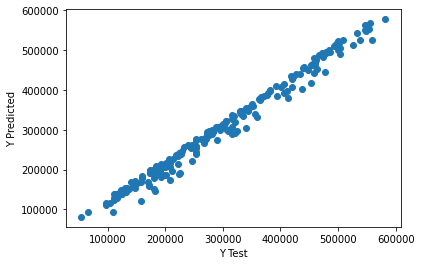

In [107]:
plt.scatter(y_test,y_prediction)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')